보통의 거래량회전율은 연간으로 계산하므로 1년의 입회일수(약 300)를 곱해주는 (일일 거래량 * 입회일수) / 상장 주식 수의 평균 의 공식으로 계산하는데, 우리는 일일 거래량회전율이 필요하므로 (일일 거래량의 총합 / 상장 주식 수의 평균)로 계산함. 또한, 개별 주식의 거래량회전율이 아닌 KTOP30의 거래량 회전율을 구해야 하므로 (30개 종목의 총 거래량의 자연로그 값 / 30개 종목의 총 상장 주식 수 평균의 자연로그 값)으로 공식을 변형한다. 회전율 100%의 의미는 상장주식총수가 연간 1회전하는 것을 의미한다. 과거의 검증으로 볼때 50%를 기준으로 130%이상이 단기경계, 20%수준이면 바닥으로 본다

In [28]:
from pykrx import stock
import pandas as pd
import numpy as np
import datetime

In [29]:
codes = ['005930',
 '035420',
 '006400',
 '051910',
 '035720',
 '000100',
 '017670',
 '005490',
 '012330',
 '096770',
 '000810',
 '011170',
 '005380',
 '068270',
 '009150',
 '090430',
 '028260',
 '139480',
 '035760',
 '000660',
 '009540',
 '066570',
 '000270',
 '251270',
 '032830',
 '105560',
 '000720',
 '055550',
 '034220',
 '006800']

In [30]:
start_date = "20200601"
end_date = "20220630"

df = stock.get_market_ohlcv(start_date, end_date, '005930').reset_index()[['날짜', '거래량']]
df['거래량'] = 0 # 빈공간 생성

for code in codes:
    df['거래량'] += stock.get_market_ohlcv(start_date, end_date, code)['거래량'].values
df

,날짜,거래량
0,2020-06-01,52101756
1,2020-06-02,55702080
2,2020-06-03,120676283
3,2020-06-04,98610055
4,2020-06-05,62517160
...,...,...
511,2022-06-24,43813091
512,2022-06-27,37949347
513,2022-06-28,31048533
514,2022-06-29,37038618


In [4]:
start = datetime.datetime.strptime(start_date, "%Y%m%d")
end = datetime.datetime.strptime(end_date, "%Y%m%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days + 1)]
date_generated

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0),
 datetime.datetime(2020, 6, 4, 0, 0),
 datetime.datetime(2020, 6, 5, 0, 0),
 datetime.datetime(2020, 6, 6, 0, 0),
 datetime.datetime(2020, 6, 7, 0, 0),
 datetime.datetime(2020, 6, 8, 0, 0),
 datetime.datetime(2020, 6, 9, 0, 0),
 datetime.datetime(2020, 6, 10, 0, 0),
 datetime.datetime(2020, 6, 11, 0, 0),
 datetime.datetime(2020, 6, 12, 0, 0),
 datetime.datetime(2020, 6, 13, 0, 0),
 datetime.datetime(2020, 6, 14, 0, 0),
 datetime.datetime(2020, 6, 15, 0, 0),
 datetime.datetime(2020, 6, 16, 0, 0),
 datetime.datetime(2020, 6, 17, 0, 0),
 datetime.datetime(2020, 6, 18, 0, 0),
 datetime.datetime(2020, 6, 19, 0, 0),
 datetime.datetime(2020, 6, 20, 0, 0),
 datetime.datetime(2020, 6, 21, 0, 0),
 datetime.datetime(2020, 6, 22, 0, 0),
 datetime.datetime(2020, 6, 23, 0, 0),
 datetime.datetime(2020, 6, 24, 0, 0),
 datetime.datetime(2020, 6, 25, 0, 0),
 datetime.datetime(2020, 6, 26, 0,

In [5]:
stocks = []
for date in date_generated:
    date = datetime.datetime.strftime(date, "%Y%m%d")
    df2 = stock.get_market_cap(date)
    if df2['종가'].iloc[0] == 0:
        continue
    stocks.append(sum(df2.loc[codes, '상장주식수']))
len(stocks)

516

In [23]:
df['거래량'] = np.log(df['거래량'])
stock_log = np.log(np.array(stocks) / 30)

array([19.74352791, 19.74352791, 19.74352791, 19.74352791, 19.74352791,
       19.74352791, 19.74352791, 19.74352791, 19.74352791, 19.74310862,
       19.74310862, 19.74310862, 19.74310862, 19.74195317, 19.74195317,
       19.74195338, 19.74195338, 19.74195338, 19.74195338, 19.74198242,
       19.74198242, 19.74198242, 19.74198242, 19.74198242, 19.74198242,
       19.74198242, 19.74198242, 19.74198242, 19.74198242, 19.74198653,
       19.74198653, 19.74198653, 19.74198653, 19.74198653, 19.74198653,
       19.74198678, 19.74198678, 19.74198678, 19.74198678, 19.74198678,
       19.74198678, 19.74198678, 19.74198678, 19.74198678, 19.74198678,
       19.74198678, 19.74198678, 19.74198678, 19.74198678, 19.7420017 ,
       19.7420017 , 19.7420017 , 19.7420017 , 19.7420017 , 19.7420017 ,
       19.74200654, 19.74200654, 19.74200654, 19.74200706, 19.74200706,
       19.74200706, 19.74200706, 19.74200706, 19.74200706, 19.74200706,
       19.74200706, 19.74200706, 19.74200706, 19.74200706, 19.74

In [25]:
df['거래량'] = round(df['거래량'] / stock_log, 5)
deno = max(df['거래량']) - min(df['거래량'])
df['거래량'] = (df['거래량'] - min(df['거래량'])) / deno
df

,날짜,거래량
0,2020-06-01,0.381022
1,2020-06-02,0.410100
2,2020-06-03,0.746989
3,2020-06-04,0.658981
4,2020-06-05,0.460427
...,...,...
511,2022-06-24,0.288971
512,2022-06-27,0.226428
513,2022-06-28,0.139195
514,2022-06-29,0.215933


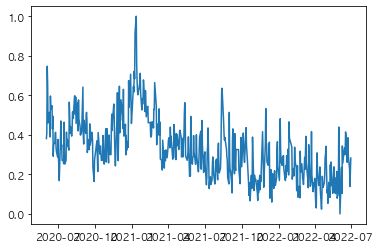

In [26]:
import matplotlib.pyplot as plt

plt.plot(df['날짜'], df['거래량'])